# ECE 351 - Lab #9
## Fast Fourier Transform
### Introduction
The purpose of this lab is to become familiar with the Fast Fourier Transform, and how to implement it in Python using the `scipy.fftpack` package.

In [1]:
import numpy as np
import scipy.fftpack
import matplotlib.pyplot as plt

### Task #1

In [2]:
def fast_fourier(x_func, sample_freq):
    N = len(x_func) # Length of the signal
    x_fft = scipy.fftpack.fft(x_func) # FFT of x(t)
    x_fft_shift = scipy.fftpack.fftshift(x_fft) # Shift zero-frequency to center
    freq = np.arange(-N/2, N/2) * sample_freq / N # Frequencies for the output signal
    x_mag = abs(x_fft_shift) / N # Magnitudes of the signal
    x_phi = np.angle(x_fft_shift) # Phase of the signal
    
    for c, mag in enumerate(x_mag):
        if abs(mag) < 1e-10:
            x_phi[c] = 0
    
    return (freq, x_mag, x_phi)

# Return a changed time array for a set sample frequency and end time
def adjust_time(sample_freq, t_end):
    return (sample_freq, np.arange(0, t_end, 1 / sample_freq))

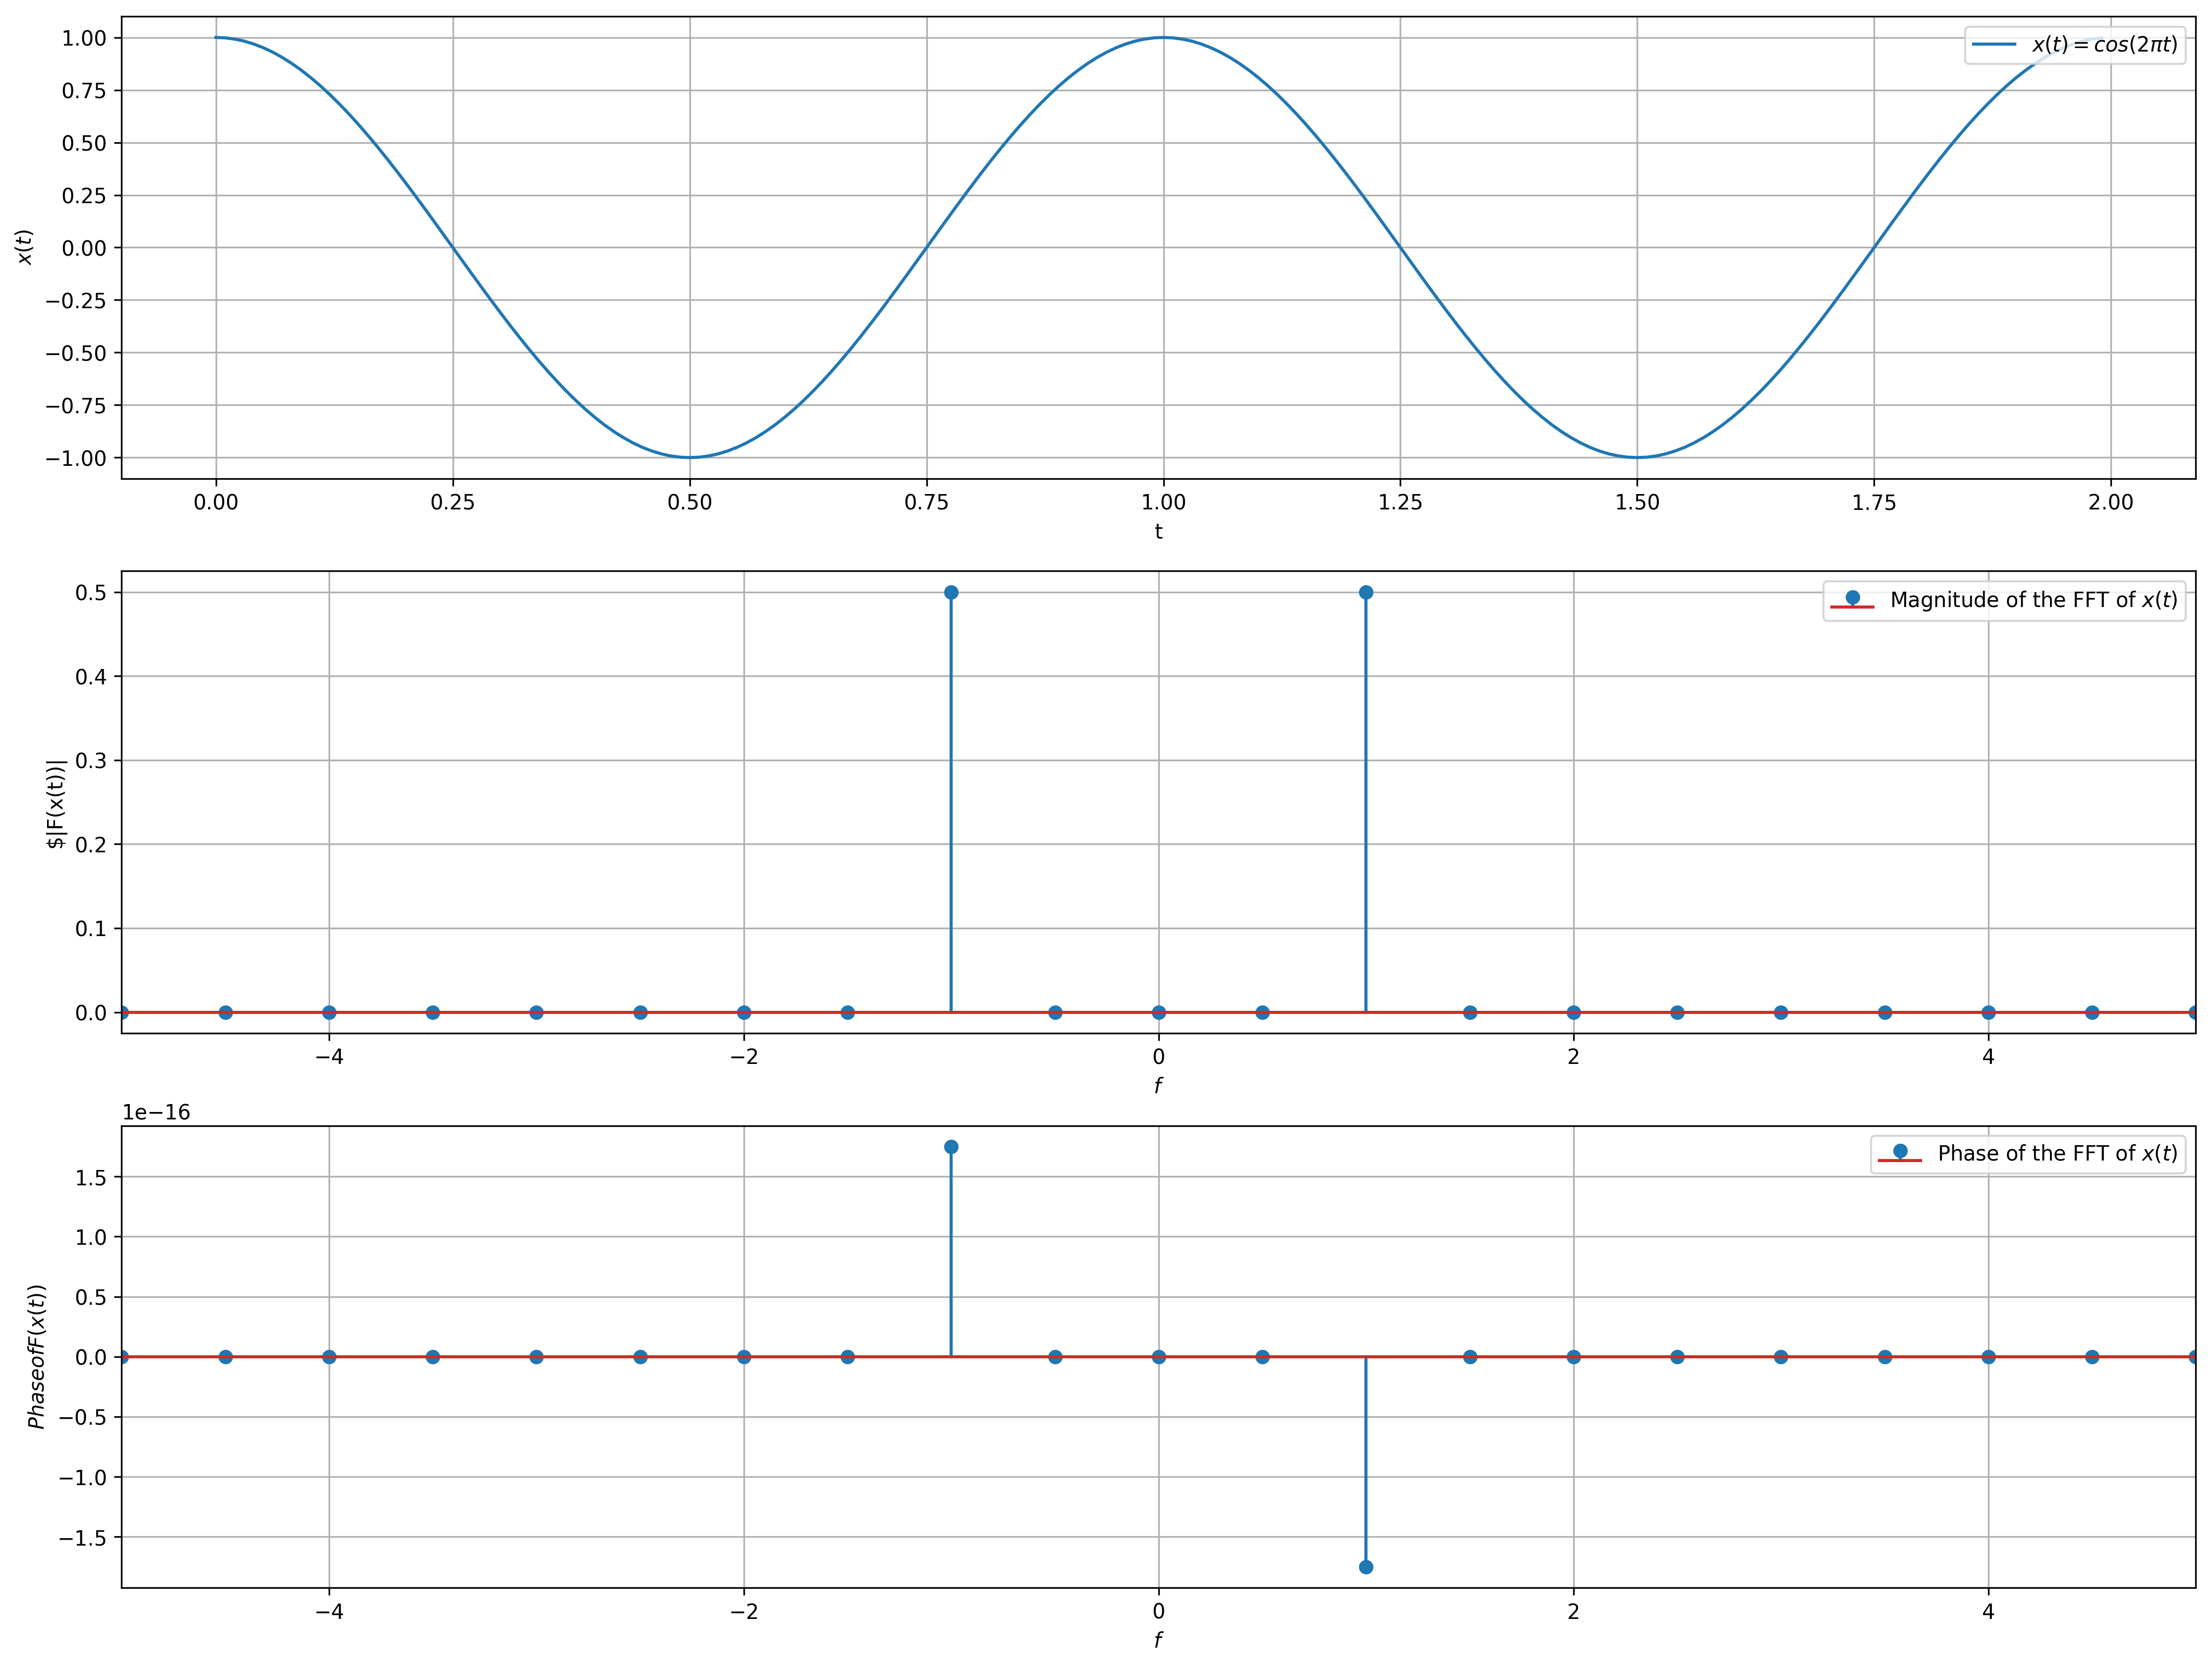

In [3]:
f_samp, t = adjust_time(100, 2)
x_t = np.cos(2 * np.pi * t)
freq, x_mag, x_phi = fast_fourier(x_t, f_samp)

plt.figure(figsize=(18, 14), dpi=300)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="$x(t)=cos(2\pi t)$")
plt.ylabel("$x(t)$")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(freq, x_mag, label="Magnitude of the FFT of $x(t)$")
plt.xlim(-5, 5)
plt.ylabel("$|F(x(t))|")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(freq, x_phi, label="Phase of the FFT of $x(t)$")
plt.xlim(-5, 5)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Task #2

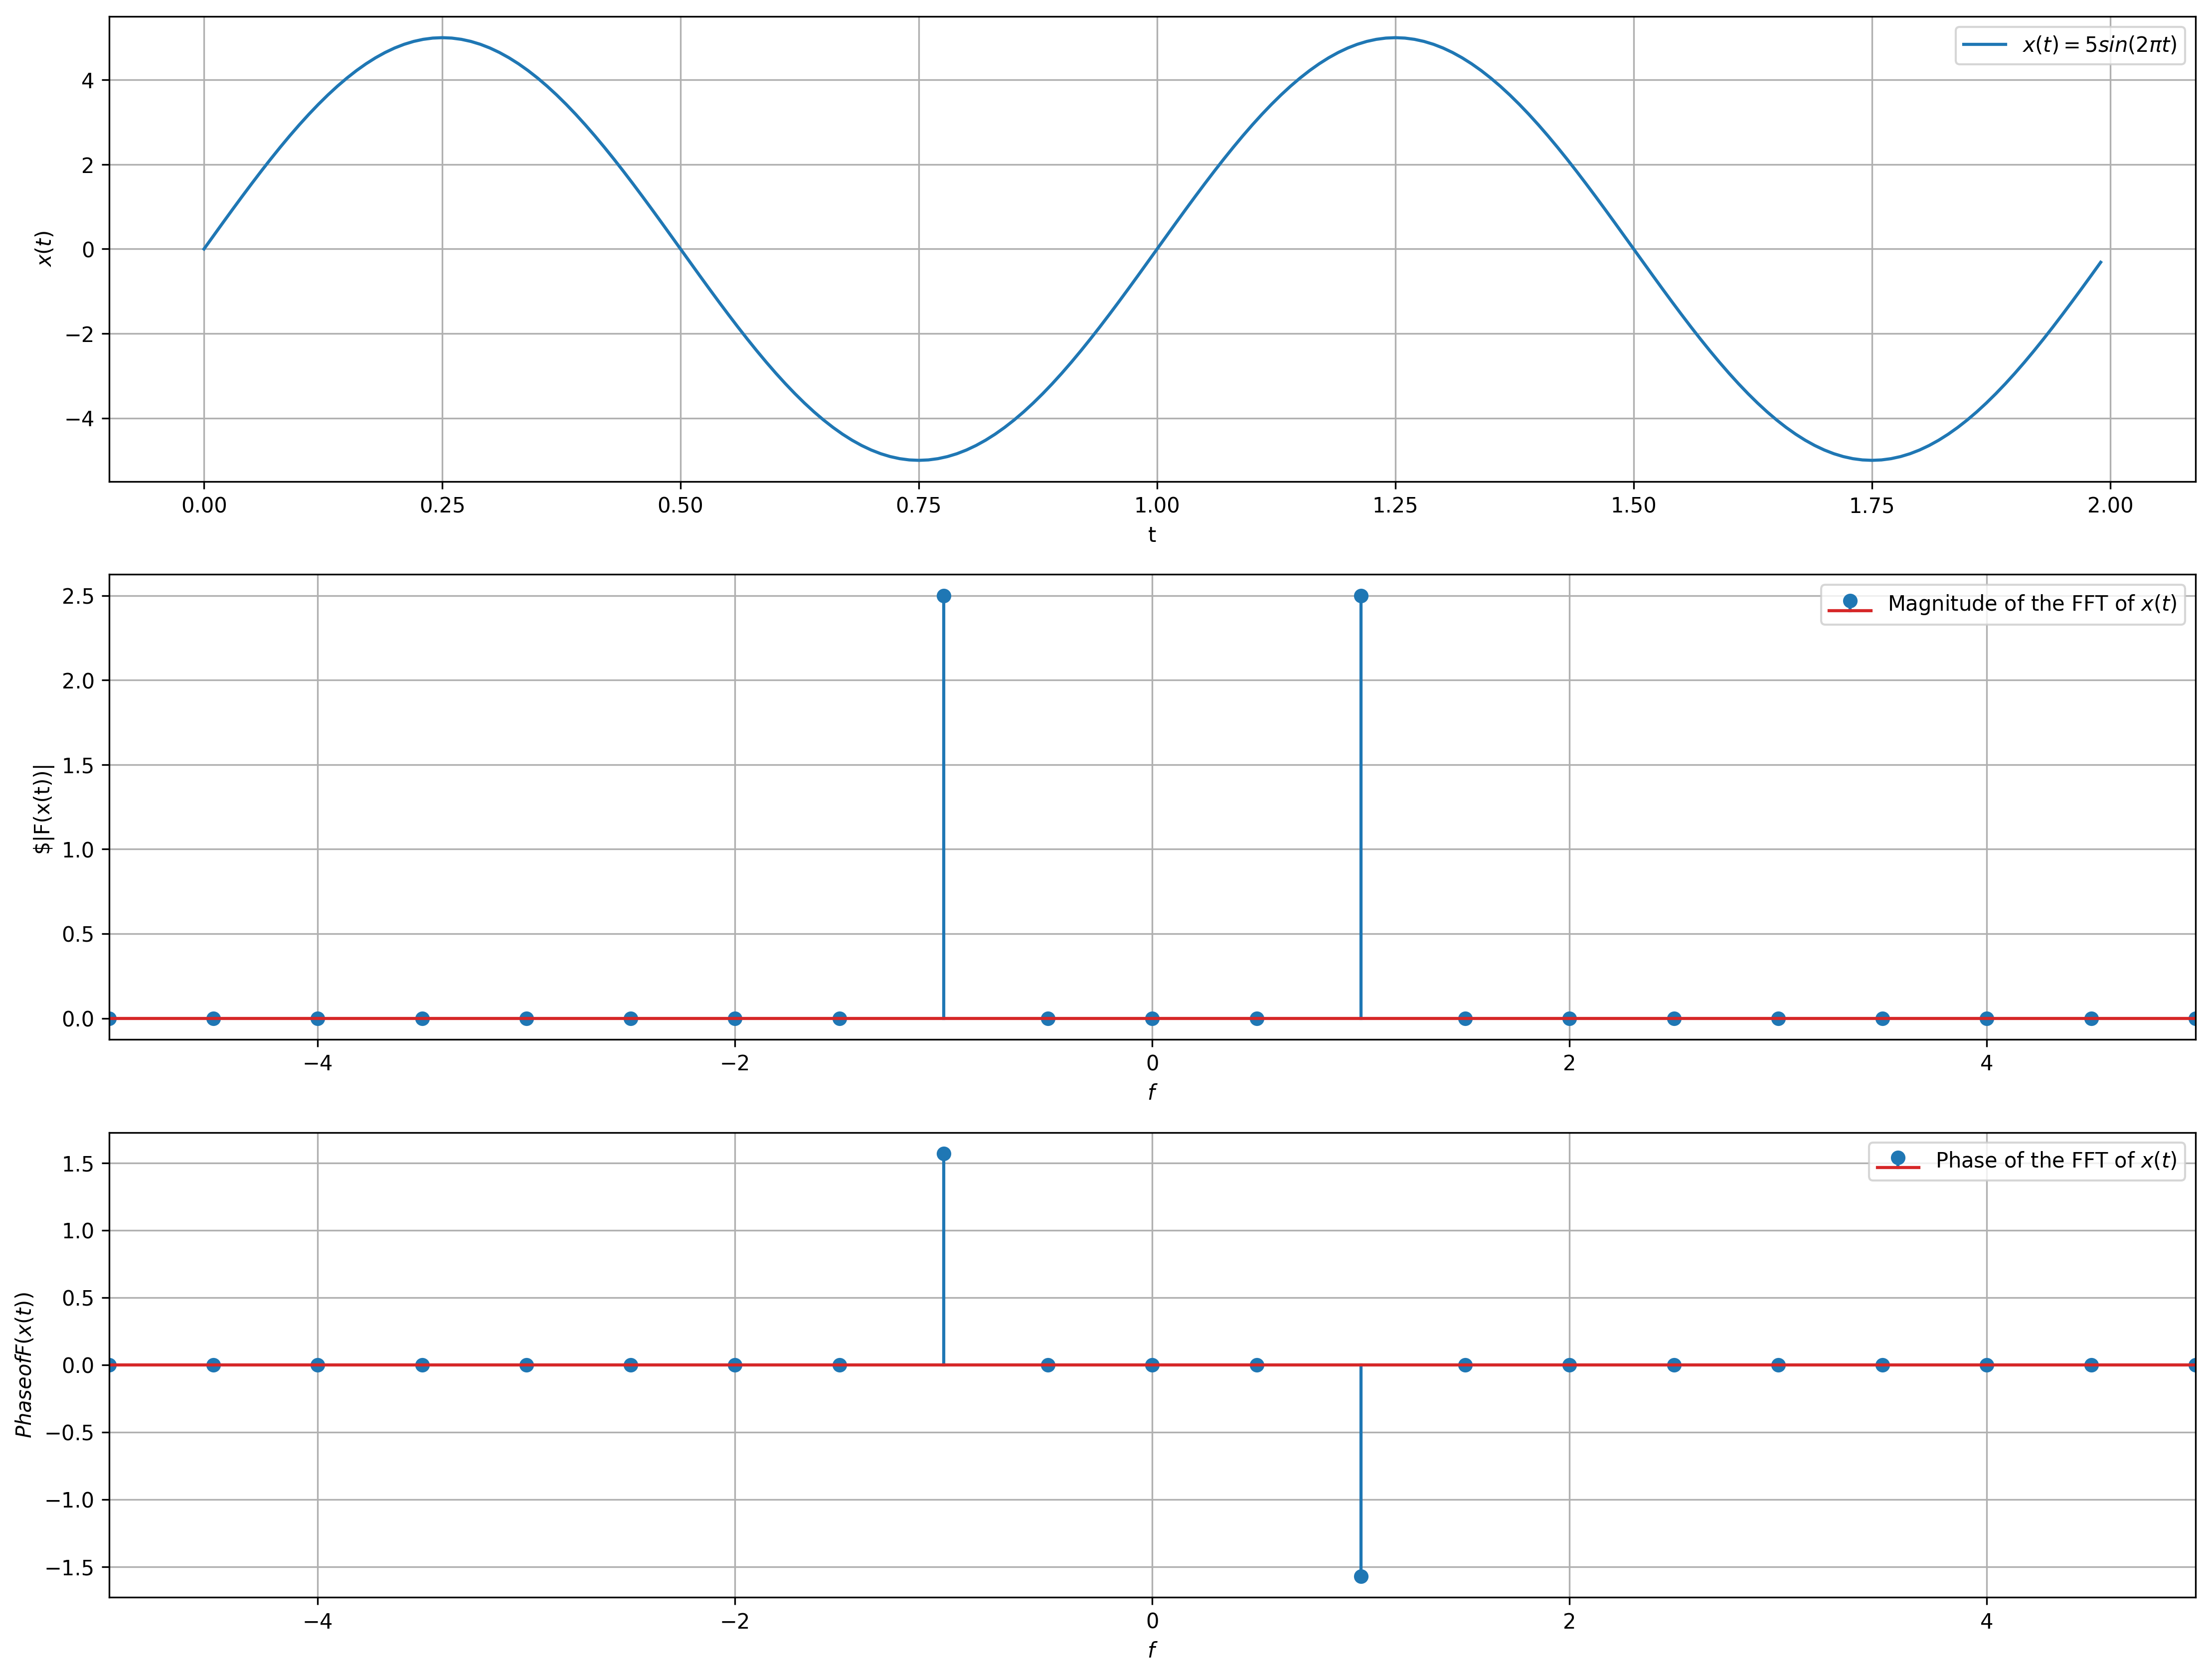

In [4]:
x_t_2 = 5 * np.sin(2 * np.pi * t)
freq_2, x_mag_2, x_phi_2 = fast_fourier(x_t_2, f_samp)

plt.figure(figsize=(18, 14), dpi=300)
plt.subplot(3, 1, 1)
plt.plot(t, x_t_2, label="$x(t)=5sin(2\pi t)$")
plt.ylabel("$x(t)$")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(freq_2, x_mag_2, label="Magnitude of the FFT of $x(t)$")
plt.xlim(-5, 5)
plt.ylabel("$|F(x(t))|")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(freq_2, x_phi_2, label="Phase of the FFT of $x(t)$")
plt.xlim(-5, 5)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Task #3

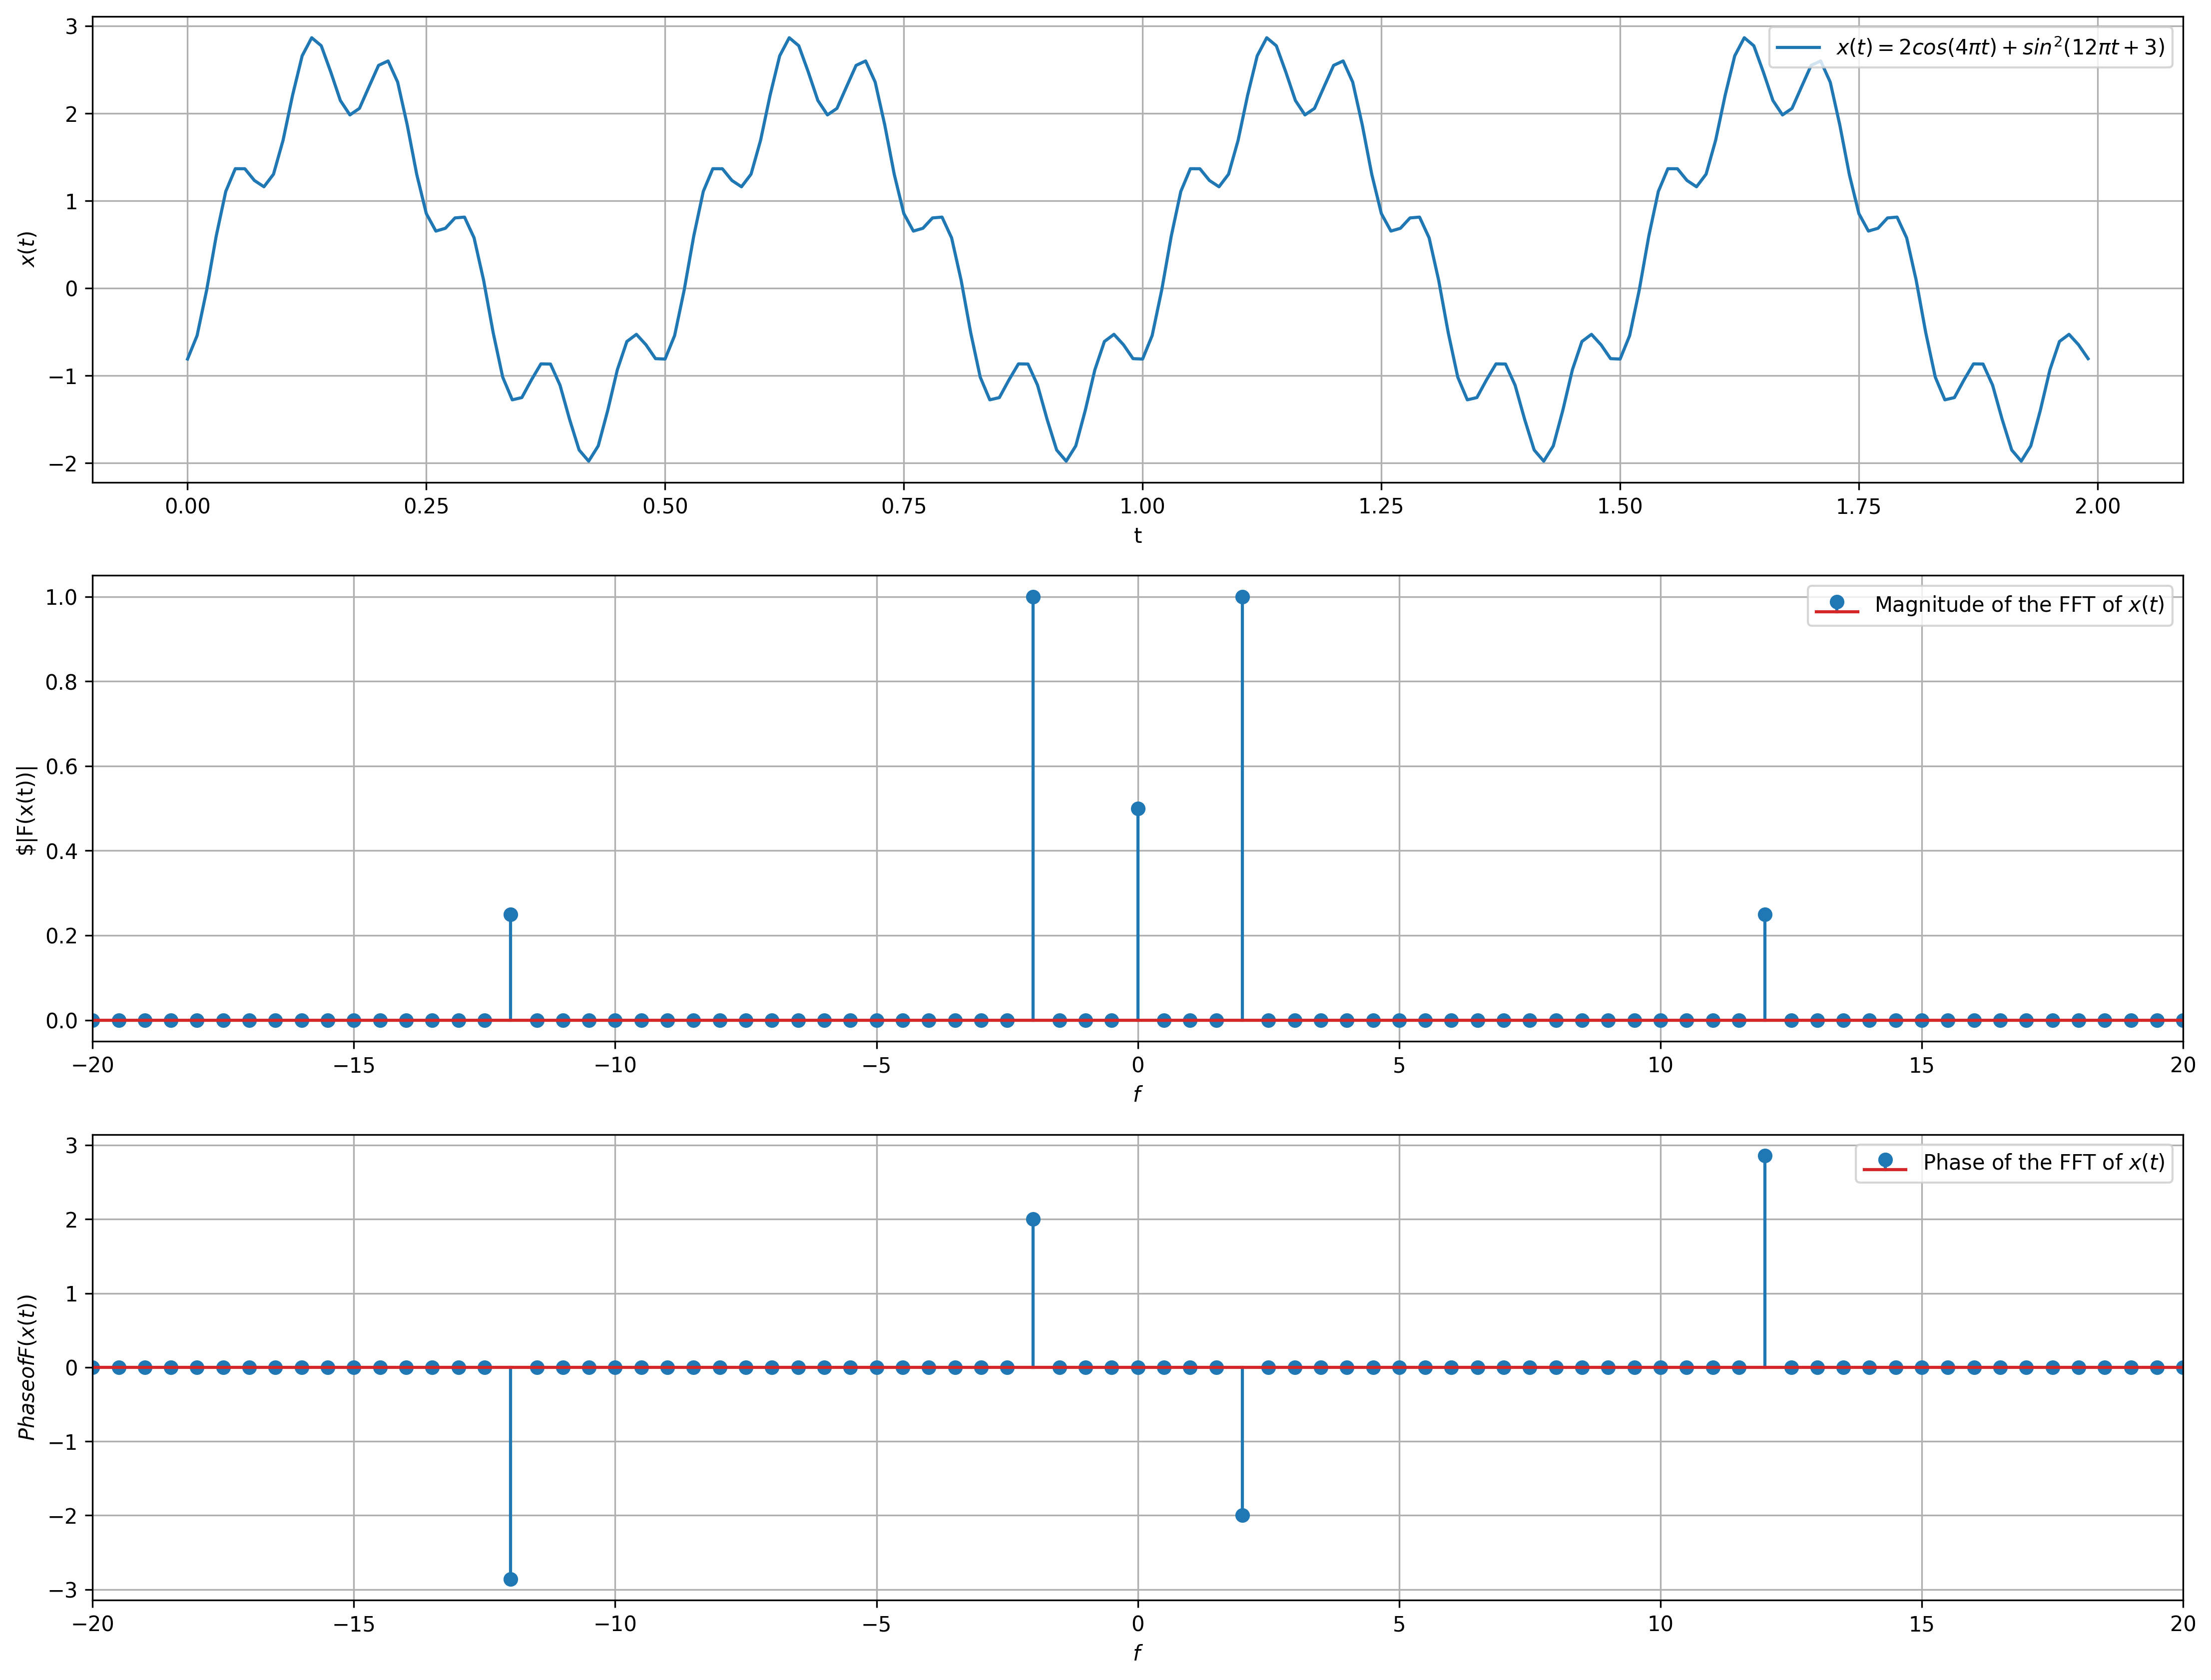

In [5]:
x_t_3 = 2 * np.cos(4 * np.pi * t - 2) + np.sin(12 * np.pi * t + 3) ** 2
freq_3, x_mag_3, x_phi_3 = fast_fourier(x_t_3, f_samp)

plt.figure(figsize=(18, 14), dpi=300)
plt.subplot(3, 1, 1)
plt.plot(t, x_t_3, label="$x(t)=2cos(4\pi t)+sin^2(12\pi t+3)$")
plt.ylabel("$x(t)$")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(freq_3, x_mag_3, label="Magnitude of the FFT of $x(t)$")
plt.xlim(-20, 20)
plt.ylabel("$|F(x(t))|")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(freq_3, x_phi_3, label="Phase of the FFT of $x(t)$")
plt.xlim(-20, 20)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Task #5

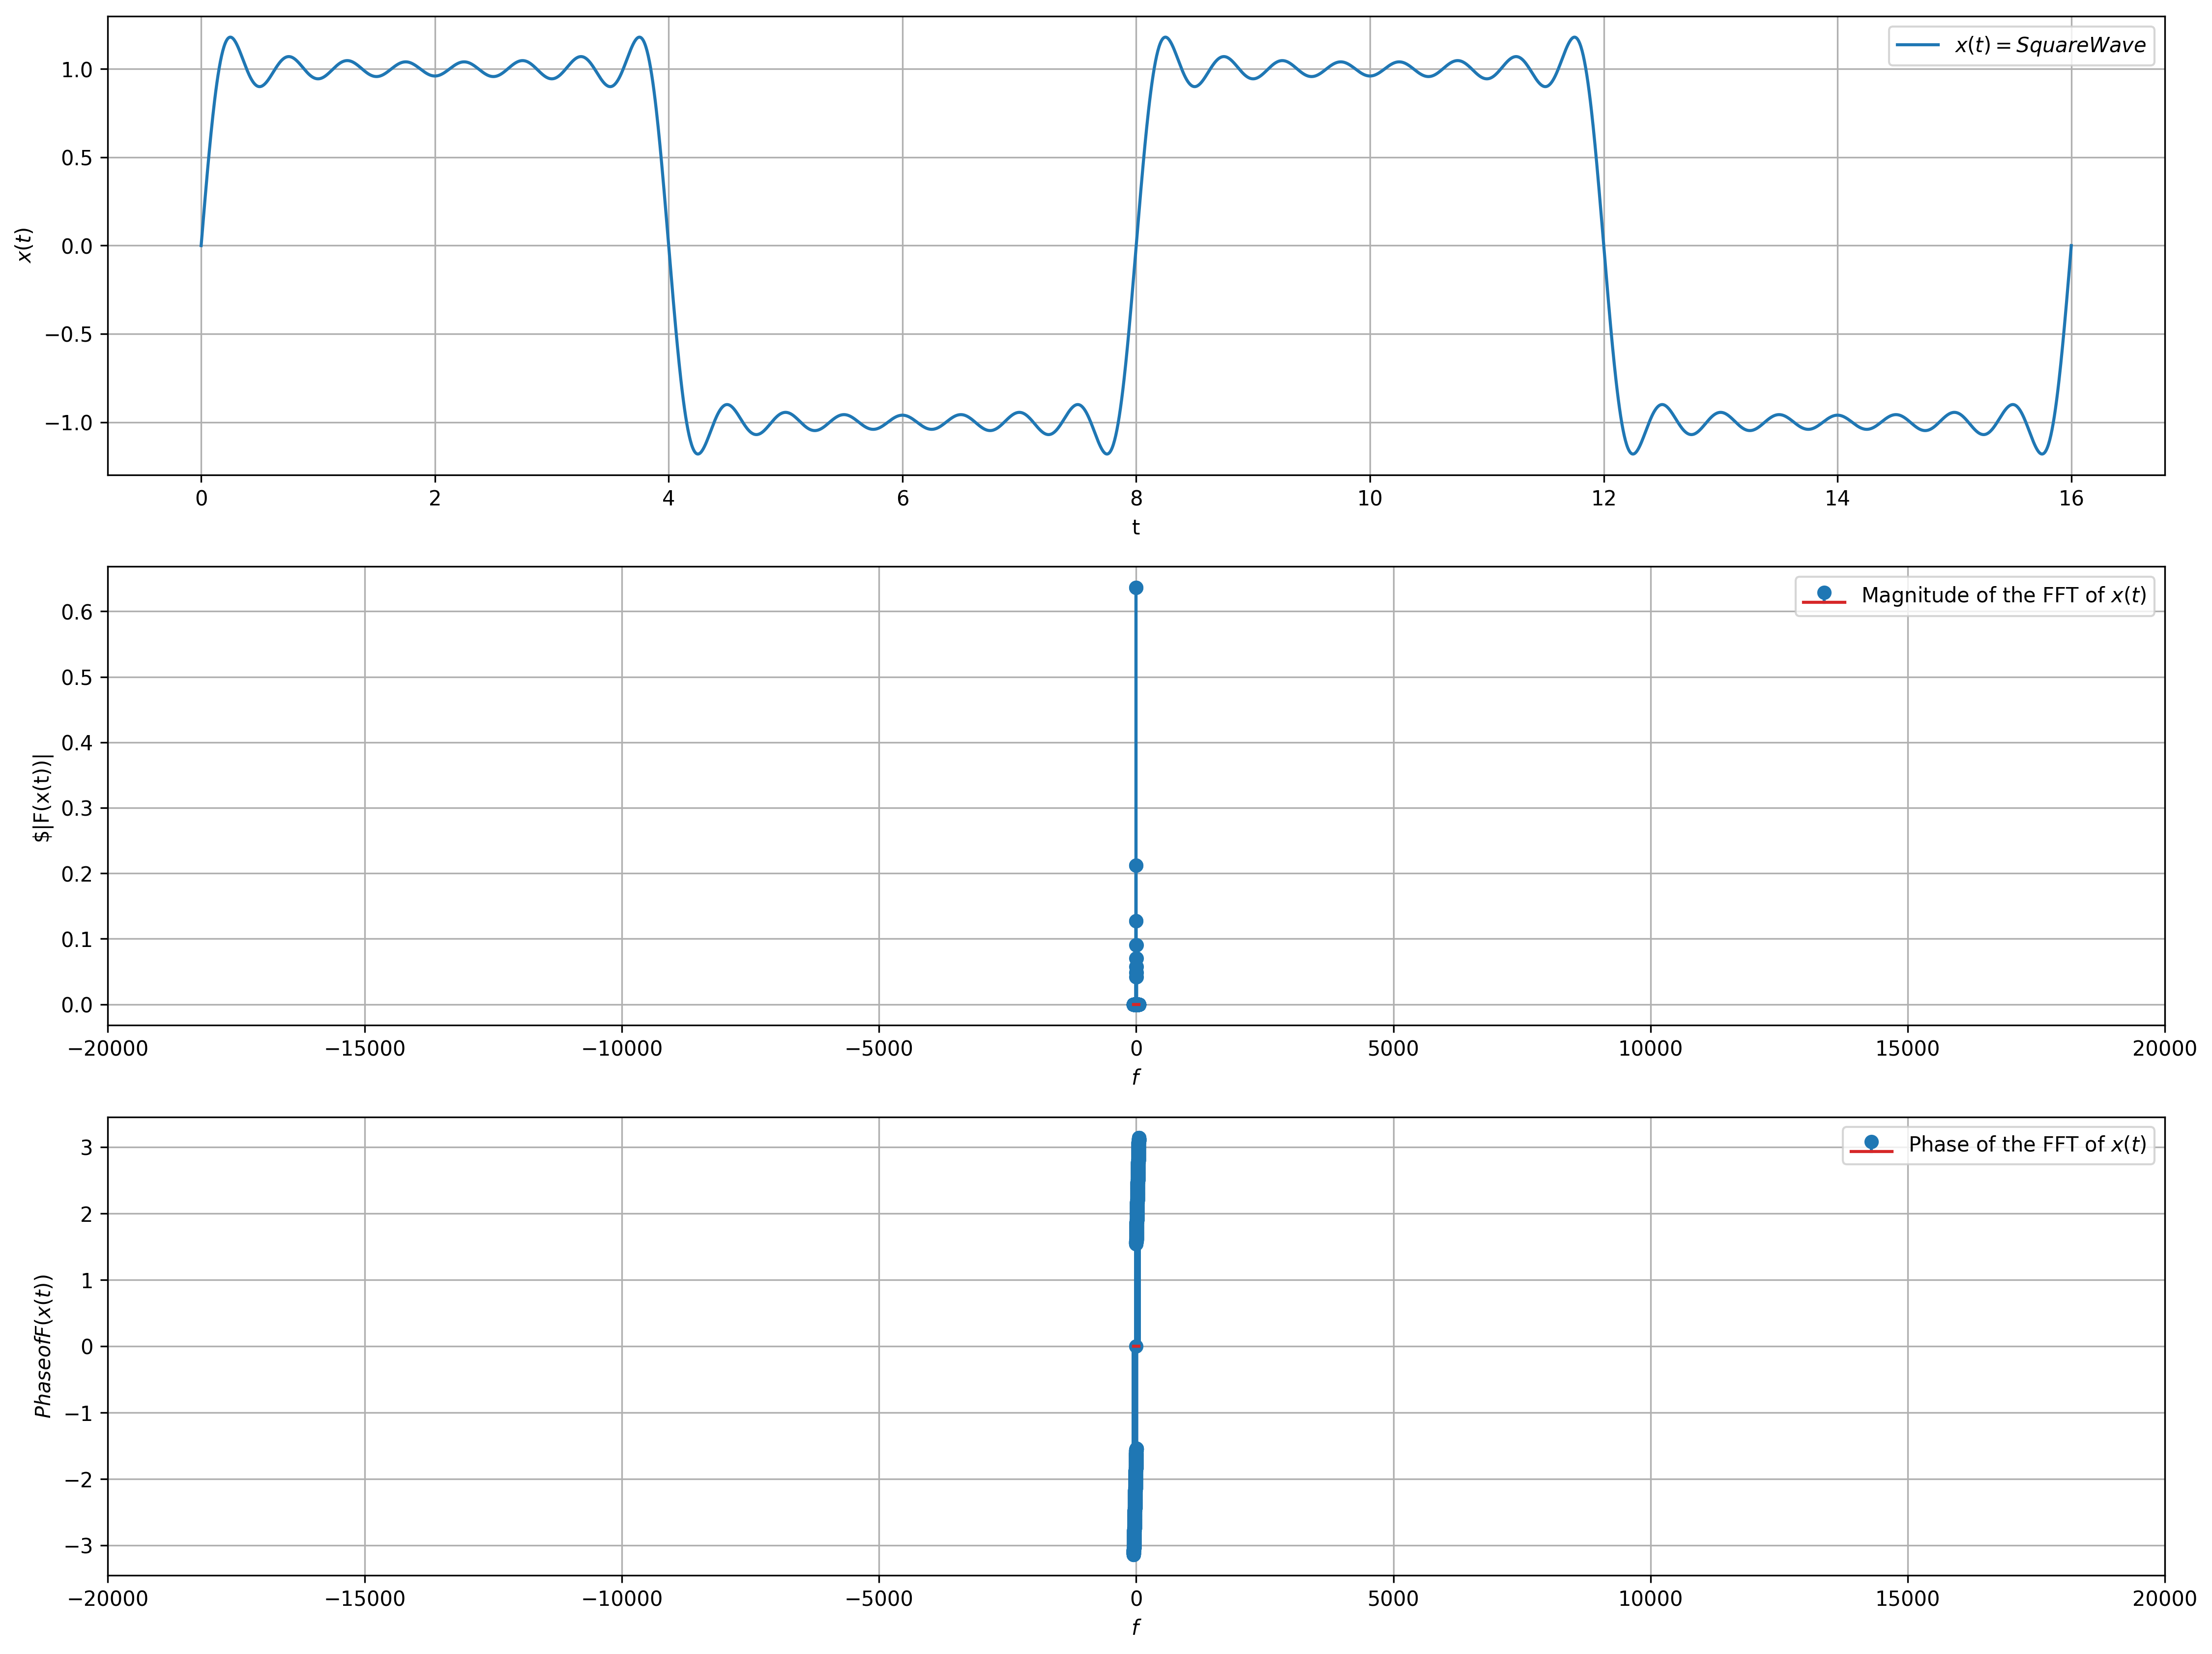

In [6]:
def a(k):
    return 0

def b(k): # To prevent NaN division by 0, add a conditional to return 0
    return (2 / (k * np.pi)) * (1 - np.cos(k * np.pi))

def fourier(t, period, a, b, N):
    approx = [a(k)*np.cos(2*np.pi*k*t/period) + 
              b(k)*np.sin(2*np.pi*k*t/period) for k in np.arange(1, N+0.1)]
    return (0.5 * a(0) + np.sum(approx, axis=0))

t = np.arange(0, 16+0.005, 0.005)
x_t_5 = fourier(t, 8, a, b, 15)

freq_5, x_mag_5, x_phi_5 = fast_fourier(x_t_5, f_samp)

plt.figure(figsize=(18, 14), dpi=300)
plt.subplot(3, 1, 1)
plt.plot(t, x_t_5, label="$x(t)=Square Wave$")
plt.ylabel("$x(t)$")
plt.xlabel("t")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(freq_5, x_mag_5, label="Magnitude of the FFT of $x(t)$")
plt.xlim(-20000, 20000)
plt.ylabel("$|F(x(t))|")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(freq_5, x_phi_5, label="Phase of the FFT of $x(t)$")
plt.xlim(-20000, 20000)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

### Questions

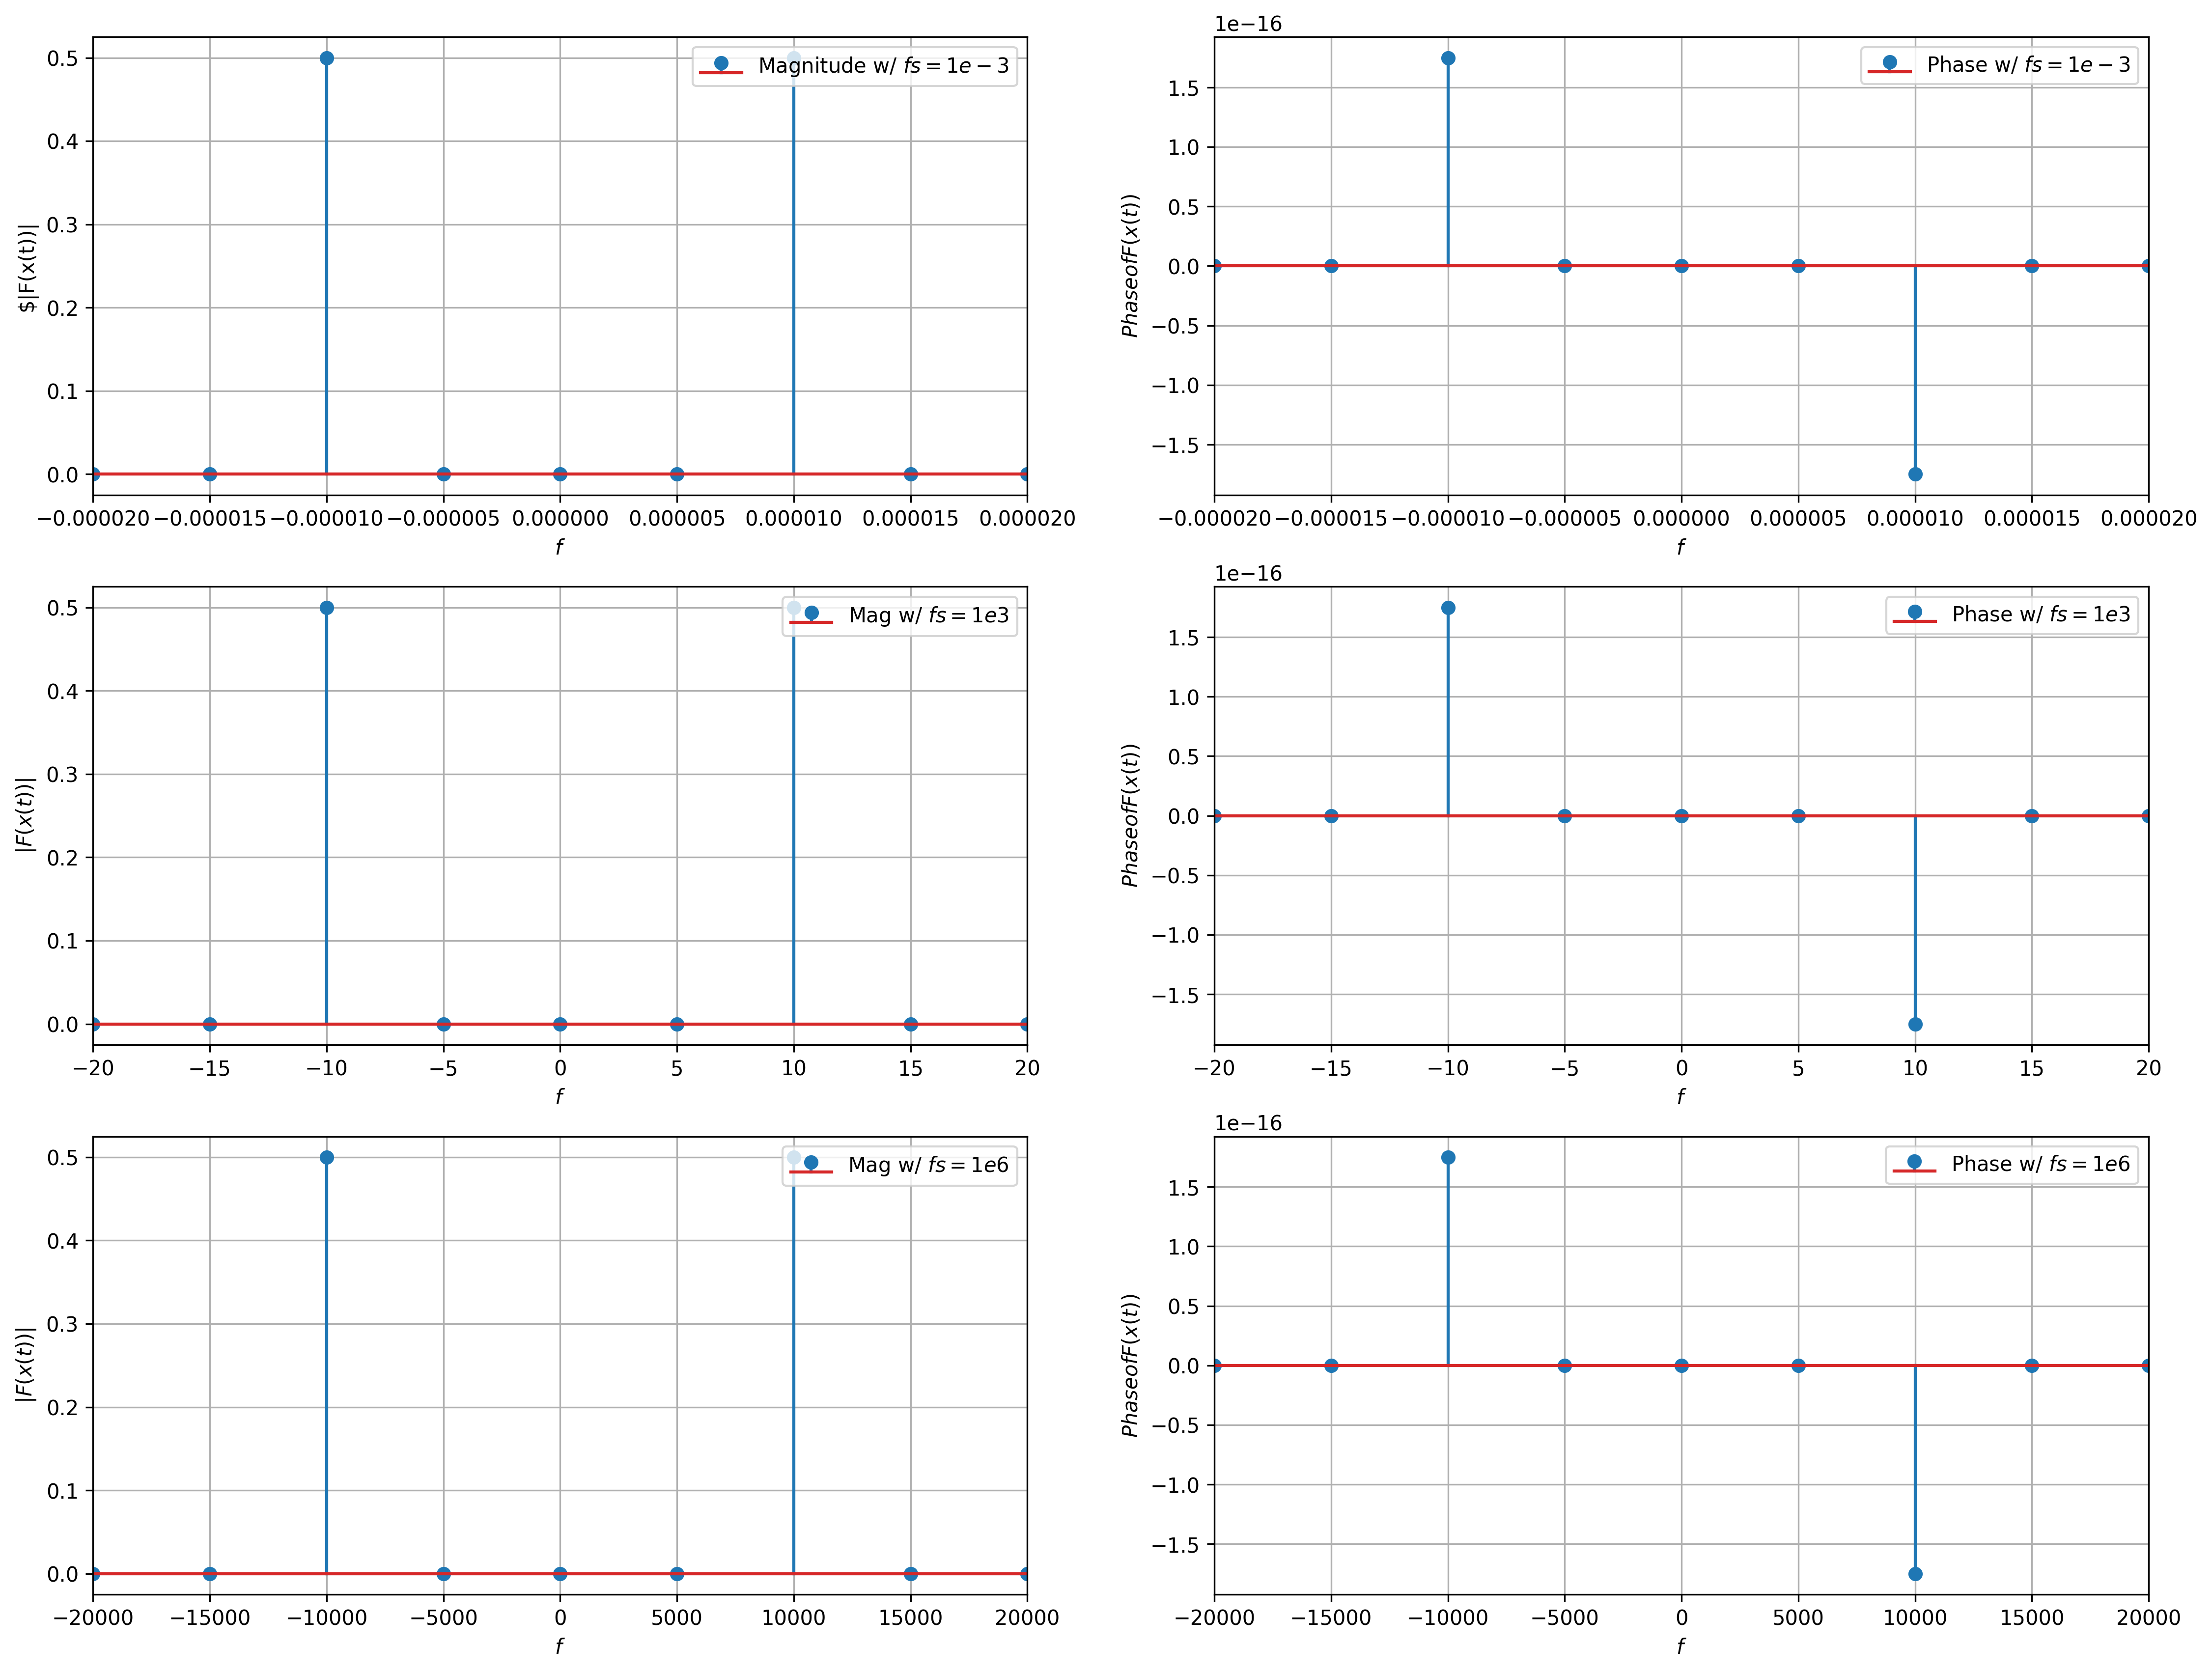

In [7]:
f_samp, t = adjust_time(1e-3, 2)
freq_a, x_mag_a, x_phi_a = fast_fourier(x_t, f_samp)
f_samp, t = adjust_time(1e3, 2)
freq_b, x_mag_b, x_phi_b = fast_fourier(x_t, f_samp)
f_samp, t = adjust_time(1e6, 2)
freq_c, x_mag_c, x_phi_c = fast_fourier(x_t, f_samp)

plt.figure(figsize=(18, 14), dpi=300)
plt.subplot(3, 2, 1)
plt.stem(freq_a, x_mag_a, label="Magnitude w/ $fs=1e-3$")
plt.xlim(-2e-5, 2e-5)
plt.ylabel("$|F(x(t))|")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.stem(freq_a, x_phi_a, label="Phase w/ $fs=1e-3$")
plt.xlim(-2e-5, 2e-5)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.stem(freq_b, x_mag_b, label="Mag w/ $fs=1e3$")
plt.xlim(-20, 20)
plt.ylabel("$|F(x(t))|$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.stem(freq_b, x_phi_b, label="Phase w/ $fs=1e3$")
plt.xlim(-20, 20)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.stem(freq_c, x_mag_c, label="Mag w/ $fs=1e6$")
plt.xlim(-2e4, 2e4)
plt.ylabel("$|F(x(t))|$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.stem(freq_c, x_phi_c, label="Phase w/ $fs=1e6$")
plt.xlim(-2e4, 2e4)
plt.ylabel("$Phase of F(x(t))$")
plt.xlabel("$f$")
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

1. As shown in the above graphs, as `f_samp` increases, the pulses become further and further spread out. Conversely, as `f_samp` decreases, the impulses are closer together. 
2. Rather than having seemingly random phase angles for the function, by eliminating the phase for all places where the function is practically zero, the parts where the phase is zero become a lot more evident. This is particularly important for the cosine components, because the whole phase should be zero, but without these eliminations the curve is very sporadic.
3. $F(cos(2\pi f_0 t))$, where $f_0=1$... $\frac{1}{2}(\delta(f-1)+\delta(f+1))$. This is what we see in the plot for Task 1. Two impulses at $f=-1, f=1$, both with amplitudes of 0.5. For task 2: $F(5sin(2\pi f_0 t))$, where $f_0=1$... $\frac{5}{j2}(\delta(f-1)-\delta(f+1))$. This is seen in the graph for task 2, except since we are only looking at the _magnitude_, the impulse is positive instead of negative. But the impulses are at the correct spot (at f=-1, f=1), and their amplitudes are both $\frac{5}{2}$.
4. The lab was very clear and had realistic expectations. I think the meaning of `fs` or `f_samp` in my case, could be more clear as I do not think the handout does a particularly good job of explaining what this parameter means. 

### Conclusion
This lab was a great introduction into the fundamentals of the Fast Fourier Transform (FFT). Given that this is our first interaction with the frequency domain, it is a very simple lab and shows how we can use the `SciPy` package's FFT functions with relative ease. The results for this lab are significantly less intuitive than previous labs, which I think shows the relative complexity of the Fourier transform.